# Curriculum Learning

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
import torch
from tqdm.notebook import tqdm
from copy import copy, deepcopy
import cmath
import chess
from utils import saver, loader

from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

print("PyTorch version:", torch.__version__)  
print("CUDA toolkit version PyTorch was built with:", torch.version.cuda)  
print("cuDNN version:", torch.backends.cudnn.version()) 
print("cuda available:", torch.cuda.is_available())

torch.set_float32_matmul_precision('high')

PyTorch version: 2.7.1+cu128
CUDA toolkit version PyTorch was built with: 12.8
cuDNN version: 90701
cuda available: True


In [ ]:
torch.manual_seed(42)
random.seed(42)
logger = Logger(sample_freq = 1000)

agent = Agent(board_logic = BoardLogic())


opt_list = [torch.optim.Adam(agent.online_net1.parameters(), lr=1e-4), 
            torch.optim.Adam(agent.online_net2.parameters(), lr=1e-4)]

model = Model(agent = agent,
               environment = Environment(max_num_moves=200,),
               mem_capacity = 100000,
               batch_size = 1024,
               policy_update = 10,
               target_update = 5000,
               temp_constants = (0.5, 0.1, 0.00, 2000),
               opt_list=opt_list,
               scaler=torch.amp.GradScaler("cuda")
             )

In [ ]:
model.train(num_episodes = 1000, logger = logger)
#saver(model,"model_10000_episodes.pth")

  0%|          | 0/1000 [00:00<?, ?it/s]

0 checkmate! 50 0.3197133992289419
0
1 checkmate! 70 0.3198718799750756
2 draw! 199 0.35618930682043326
3 draw! 199 0.1417229306535179
4 draw! 199 0.09561725372686393
5 checkmate! 166 0.045099286053715354
6 checkmate! 122 0.38807489920992433
7 draw! 199 0.2645595636372424
8 draw! 199 0.24796565881882385
9 checkmate! 136 0.1133620348438735
10 checkmate! 83 0.46843654062545836
11 checkmate! 75 0.3116193839213387
12 checkmate! 61 0.2697672992228343
13 draw! 199 0.3367571920270615
14 draw! 199 0.1824036730908153
15 checkmate! 61 0.4288754619665978
16 checkmate! 107 0.15601173738506013
17 checkmate! 42 0.08812657275994519
18 draw! 199 0.4876532607123931
19 checkmate! 142 0.08987961264234517
20 checkmate! 126 0.3084162885329236
21 draw! 199 0.27446573887642317
22 checkmate! 128 0.23786518777152635
23 draw! 199 0.37940649428357837
24 checkmate! 136 0.35180666182974224
25 checkmate! 123 0.09393903892872746
26 checkmate! 83 0.361594576295966
27 checkmate! 58 0.23971390029717832
28 checkmate! 17

KeyboardInterrupt: 

In [ ]:
model.train(num_episodes = 10000, logger = logger)
saver(model,"model_20000_episodes.pth")

In [ ]:
model.train(num_episodes = 10000, logger = logger)
saver(model,"model_30000_episodes.pth")

In [ ]:
model.train(num_episodes = 10000, logger = logger)
saver(model,"model_40000_episodes.pth")

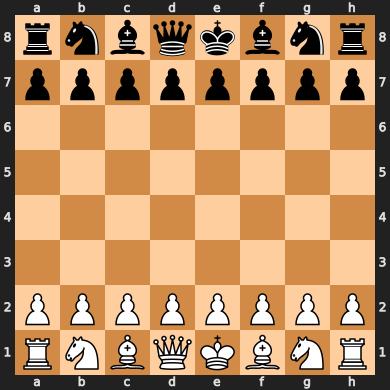

In [50]:
environment = Environment(max_num_moves=200,)
environment.reset()
#random.seed(42)
#np.random.seed(42)
#torch.manual_seed(42)

In [128]:
board = environment.get_board()

action = agent.select_action(environment, eps=0., greedy=False)
move = agent.action_to_move(action)

board_next, (reward, done) = environment.step(move)

state = agent.board_logic.board_to_state(board).to(config.device)

Q1 = agent.online_net1(state).detach()
Q2 = agent.online_net2(state).detach()
legal_moves = environment.get_legal_moves()
mask_legal = agent.get_mask_legal(legal_moves)

Q1_legal = Q1[mask_legal]
Q2_legal = Q2[mask_legal]

diff = torch.abs(Q1_legal - Q2_legal)/torch.max(torch.abs(Q1_legal), torch.abs(Q2_legal))

#print(Q1_legal)
#print(Q2_legal)

print(f"{np.mean(diff.cpu().numpy()):.4f}")

Q_legal = Q1.masked_fill(~mask_legal, -1e9)
action_star = torch.argmax(Q_legal, dim=1).to(config.device)
score = Q2[0,action_star[0]]

if not environment.mirror:
    print("White:")
    print(f"score: {score.item():.4f}")
    print(board_next)
else:
    print("Black:")
    print(f"score: {score.item():.4f}")
    print(board_next.mirror())


if board.is_checkmate():
    print("checkmate!")

if board.can_claim_threefold_repetition():
    print("draw!")

0.6801
White:
score: 0.0047
r . . q . k . r
. b p p p p b p
p p n . . n p .
. . . R . P . .
P . . N . . P .
. P . . . . . P
. R P P P . . .
B . . Q K B . .


In [ ]:
state, action, next_state, mask_legal, reward, done =model.memory.sample()

In [ ]:
model.memory.rewards[:1000]

tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-

In [4]:
def flip_move(move: chess.Move) -> chess.Move:
    """Flips a chess.Move object to correspond to a mirrored board."""
    from_square_flipped = chess.square_mirror(move.from_square)
    to_square_flipped = chess.square_mirror(move.to_square)
    
    # Promotion piece type doesn't change when mirroring the board
    # (e.g., a queen is still a queen, just on a mirrored square).
    return chess.Move(from_square_flipped, to_square_flipped, move.promotion)

In [8]:
move = chess.Move.from_uci("e2e4q")

In [9]:
flip_move(move)

Move.from_uci('e7e5q')